# 지역별 고령 운전자 교통사고 발생률 비교

In [1]:
from matplotlib import pyplot as plt
from google.oauth2 import service_account
from google.cloud import bigquery

In [2]:
credentials = service_account.Credentials.from_service_account_file("./bigquery_key.json")
client = bigquery.Client(
    credentials=credentials,
    project=credentials.project_id
)

In [3]:
plt.rc("font", family="Malgun Gothic")

In [4]:
traffic_accident_city_sql = """
    SELECT
        *
    FROM
        `calcium-channel-428804-c3.traffic_accident.traffic_accident_city_5`
"""

In [5]:
traffic_accident_city_df = client.query(traffic_accident_city_sql).to_dataframe()
traffic_accident_city_df = traffic_accident_city_df.set_index("age_group")
traffic_accident_city_df = traffic_accident_city_df.sort_index(axis=1)

C:\Users\minni\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [6]:
traffic_accident_city_df

,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
age_group,,,,,,,,,,,,,,,,,
10,169.6,1850.4,335.0,355.8,301.0,469.2,199.4,363.4,1120.4,41.8,128.8,243.4,270.2,169.8,117.6,269.0,273.0
20,852.6,7400.0,1323.2,1424.6,1202.6,1773.0,1160.8,1603.6,4655.4,127.8,531.0,1190.2,1080.8,781.8,707.0,1255.4,1202.4
30,833.0,8323.0,1579.8,1564.4,1084.8,1716.2,1079.4,1696.8,5673.2,160.6,602.6,1273.4,1137.8,735.8,662.4,1314.4,1154.2
40,1151.4,10115.8,2136.0,2089.8,1337.0,2086.6,1304.2,2018.4,6030.4,210.6,731.4,1427.0,1569.6,1102.4,806.6,1570.2,1438.2
50,1648.0,12862.4,2857.8,2931.8,1667.8,2827.2,1689.0,2625.2,7787.8,186.0,929.6,1939.6,2162.8,1512.2,892.2,1971.4,1924.4
60,717.0,4721.0,1123.2,1178.0,685.4,1110.6,697.0,1140.8,3247.0,70.6,345.4,770.8,887.4,621.2,313.4,754.4,778.0
65,1313.0,7338.6,2020.4,2600.4,1084.4,2040.6,1132.8,2027.0,5890.0,110.6,550.2,1042.4,2028.6,1361.2,631.4,1473.2,1438.8


In [7]:
total = traffic_accident_city_df.sum(axis=0)
traffic_accident_city_df = traffic_accident_city_df.div(total, axis=1) * 100

In [8]:
traffic_accident_city_df

,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
age_group,,,,,,,,,,,,,,,,,
10,2.537175,3.517122,2.944951,2.929649,4.088008,3.902390,2.745573,3.166829,3.256579,4.603524,3.372611,3.086169,2.957142,2.701929,2.847044,3.125000,3.325618
20,12.754690,14.065446,11.632118,11.730123,16.333016,14.746245,15.983257,13.974484,13.531487,14.074890,13.904163,15.091038,11.828569,12.440328,17.116157,14.584108,14.647338
30,12.461479,15.819825,13.887863,12.881233,14.733125,14.273833,14.862446,14.786670,16.489847,17.687225,15.779000,16.145965,12.452392,11.708357,16.036411,15.269517,14.060178
40,17.224666,19.227465,18.777362,17.207364,18.158359,17.354492,17.957756,17.589236,17.528093,23.193833,19.151610,18.093523,17.178129,17.541850,19.527429,18.241171,17.519795
50,24.653682,24.448026,25.122633,24.140373,22.651093,23.514147,23.256134,22.877161,22.636190,20.484581,24.341451,24.592991,23.670271,24.062759,21.599768,22.901952,23.442563
60,10.726147,8.973374,9.873938,9.699625,9.308706,9.236988,9.597114,9.941439,9.437801,7.775330,9.044252,9.773292,9.711947,9.884794,7.587275,8.763941,9.477403
65,19.642163,13.948741,17.761134,21.411633,14.727693,16.971905,15.597720,17.664180,17.120003,12.180617,14.406913,13.217021,22.201550,21.659983,15.285915,17.114312,17.527104


In [9]:
traffic_accident_city_df = traffic_accident_city_df.loc[65]

In [10]:
traffic_accident_city_df

강원    19.642163
경기    13.948741
경남    17.761134
경북    21.411633
광주    14.727693
대구    16.971905
대전    15.597720
부산    17.664180
서울    17.120003
세종    12.180617
울산    14.406913
인천    13.217021
전남    22.201550
전북    21.659983
제주    15.285915
충남    17.114312
충북    17.527104
Name: 65, dtype: float64

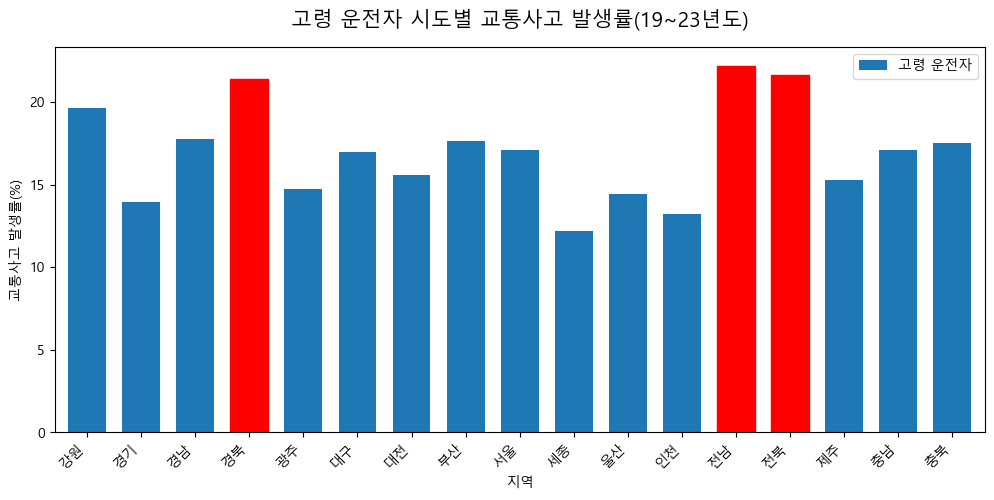

In [11]:
traffic_accident_city_df = traffic_accident_city_df.transpose()
ax = traffic_accident_city_df.plot(kind="bar", width=0.7, figsize=(12, 5))

for bar, city in zip(ax.patches, traffic_accident_city_df.index):
    if city == "전남" or city == "전북" or city == "경북":
        bar.set_color("red")

plt.title("고령 운전자 시도별 교통사고 발생률(19~23년도)", size=15, pad=15)
plt.xlabel("지역")
plt.ylabel("교통사고 발생률(%)")
plt.xticks(rotation=45, ha="right")
plt.legend(["고령 운전자"], loc="best")
plt.savefig("./result/traffic_accident_city_v6.png", bbox_inches="tight")

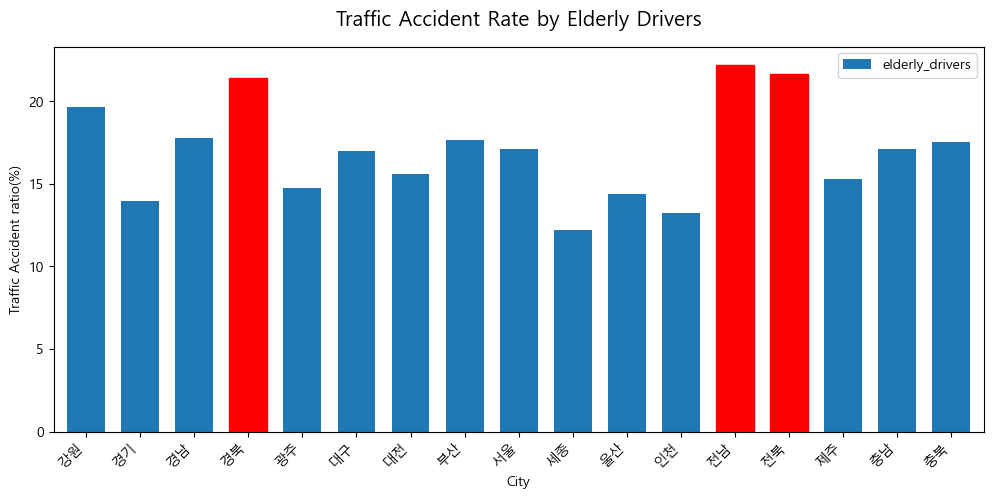

In [13]:
ax = traffic_accident_city_df.plot(kind="bar", width=0.7, figsize=(12, 5))

for bar, city in zip(ax.patches, traffic_accident_city_df.index):
    if city == "전남" or city == "전북" or city == "경북":
        bar.set_color("red")

plt.title("Traffic Accident Rate by Elderly Drivers", size=15, pad=15)
plt.xlabel("City")
plt.ylabel("Traffic Accident ratio(%)")
plt.xticks(rotation=45, ha="right")
plt.legend(["elderly_drivers"], loc="best")
plt.savefig("./result/traffic_accident_city_v5.png", bbox_inches="tight")